In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style = 'darkgrid')

from utils import scatter_plot
import pickle
from sklearn.ensemble import RandomForestRegressor, StackingRegressor

In [3]:
train = pd.read_csv('./data/SynDepth_train_set.csv', converters={'site_no': str}, low_memory=False)
test = pd.read_csv('./data/SynDepth_test_set.csv', converters={'site_no': str}, low_memory=False)

In [4]:
X_train = train.drop(columns=['site_no', 'mean_depth_va'])
X_test = test.drop(columns=['site_no', 'mean_depth_va'])

y_train = train[['mean_depth_va']]
y_test = test[['mean_depth_va']]

In [26]:
with open('./data/ml_weights/rf_best_model', "rb") as fp:
    rf = pickle.load(fp)

with open('./data/ml_weights/xgb_best_model', "rb") as fp:
    xgb = pickle.load(fp)

with open('./data/ml_weights/mlp_best_model', "rb") as fp:
    mlp = pickle.load(fp)

with open('./data/ml_weights/svr_best_model', "rb") as fp:
    svr = pickle.load(fp)

In [27]:
estimators = [('rf', rf), ('xgb', xgb), ('mlp', mlp), ('svr', svr)]
reg = StackingRegressor(estimators=estimators, cv='prefit', final_estimator=RandomForestRegressor( n_estimators=10, random_state=42))

In [28]:
reg.fit(X_train.to_numpy(), y_train.to_numpy().ravel())

StackingRegressor(cv='prefit',
                  estimators=[('rf',
                               RandomForestRegressor(max_depth=14,
                                                     max_features='auto',
                                                     min_samples_split=5,
                                                     n_estimators=10, n_jobs=-1,
                                                     random_state=42)),
                              ('xgb',
                               GradientBoostingRegressor(learning_rate=0.14264219278216356,
                                                         n_estimators=400,
                                                         random_state=42)),
                              ('mlp',
                               MLPRegressor(hidden_layer_sizes=(50, 50, 50),
                                            max_iter=100)),
                              ('svr', SVR(C=10, gamma=0.1))],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=42))

In [29]:
y_pred = reg.predict(X_test.to_numpy())

NSE: 0.9809, R2: 0.9813, PBias: 0.0097, MSE: 0.8510


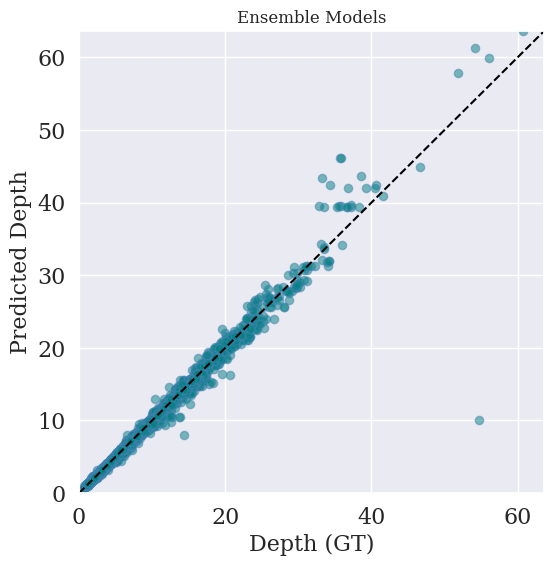

In [30]:
scatter_plot(y_test, y_pred, model_name='Ensemble Models')

In [31]:
with open('./data/ml_weights/ensemble_model', "wb") as fp:
    pickle.dump(reg, fp)